In [0]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

---
# Load dataset

In [115]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2019-07-29 04:13:14--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.05s   

2019-07-29 04:13:15 (7.00 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



In [116]:
df = pd.read_csv("kc_house_data.csv")

# take a look at the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


# Data Exploratory Analysis and Preprocessing

## Statistical Information

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 21 columns):
id               3165 non-null int64
date             3165 non-null object
price            3165 non-null float64
bedrooms         3165 non-null int64
bathrooms        3165 non-null float64
sqft_living      3165 non-null int64
sqft_lot         3165 non-null int64
floors           3165 non-null float64
waterfront       3165 non-null int64
view             3165 non-null int64
condition        3165 non-null int64
grade            3165 non-null int64
sqft_above       3165 non-null int64
sqft_basement    3165 non-null int64
yr_built         3165 non-null int64
yr_renovated     3165 non-null int64
zipcode          3165 non-null int64
lat              3165 non-null float64
long             3165 non-null float64
sqft_living15    3164 non-null float64
sqft_lot15       3164 non-null float64
dtypes: float64(7), int64(13), object(1)
memory usage: 519.3+ KB


In [118]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.165000e+03,3.165000e+03,3165.000000,3165.000000,3165.000000,3.165000e+03,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3164.000000,3164.000000
mean,4.645675e+09,5.354183e+05,3.381359,2.071564,2070.030964,1.524746e+04,1.434755,0.009795,0.244234,3.459084,7.615482,1761.024329,309.006635,1967.480885,94.638863,98077.137757,47.557908,-122.212364,1982.544564,13176.302465
std,2.853857e+09,3.808415e+05,0.895398,0.768327,920.106459,4.253820e+04,0.507771,0.098498,0.776188,0.682533,1.166191,815.906643,459.089397,28.094781,424.375685,54.169012,0.140785,0.139564,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.200500e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459800,-122.324000,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1969.000000,0.000000,98059.000000,47.572600,-122.226000,1830.000000,7873.000000
75%,7.355700e+09,6.400000e+05,4.000000,2.500000,2500.000000,1.122000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680400,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


In [119]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    1
sqft_lot15       1
dtype: int64

In [120]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


## Remove unneeded features

The following features will be removed because of its coressponding reasons

1. lat and long =  Both are redundant with zipcode
2. Id = Redundand
3. sqft_living and sqft_lot = Both are already better represented with sqft_living15 and sqft_lot15
4. Date = Hard to manage
5. sqft_above and sqft_basement = Both are already suitably representated by sqft_living15


In [121]:
df.drop(columns=["lat", "long", "id", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "date"], inplace=True)
df.head(2)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1955,0,98178,1340.0,5650.0
1,538000.0,3,2.25,2.0,0,0,3,7,1951,1991,98125,1690.0,7639.0


## Remove rows that contain null values

Remove rows that contains null values

In [122]:
# Before removal
print(df.shape)

df.dropna(axis=0, inplace=True)

# After removal
print(df.shape)

(3165, 13)
(3164, 13)


## Gainning insight about numeric features

Plotting histogram to findout distribution of features

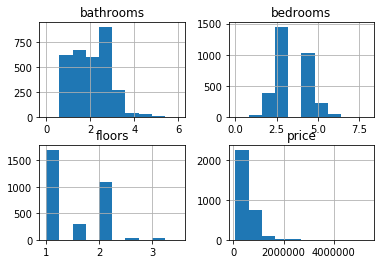

<Figure size 1440x1440 with 0 Axes>

In [123]:
#Plot the first four features
viz = df[['price',
 'bedrooms',
 'bathrooms',
 'floors']]

viz.hist()
plt.figure(figsize=(20, 20))
plt.show()

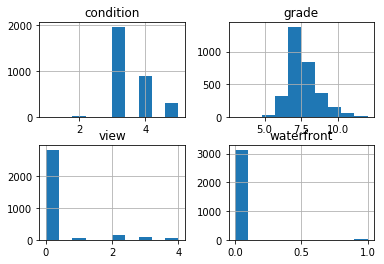

<Figure size 1440x1440 with 0 Axes>

In [124]:
#Plot the the next four features
viz = df[['waterfront',
 'view',
 'condition',
 'grade',]]

viz.hist()
plt.figure(figsize=(20, 20))
plt.show()

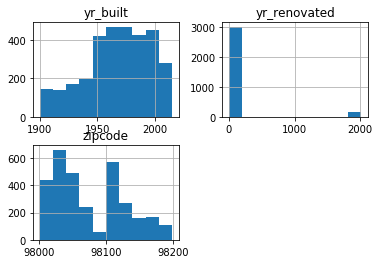

<Figure size 1440x1440 with 0 Axes>

In [125]:
#Plot the the next three features
viz = df[[
 'yr_built',
 'yr_renovated', 'zipcode',]]

viz.hist()
plt.figure(figsize=(20, 20))
plt.show()

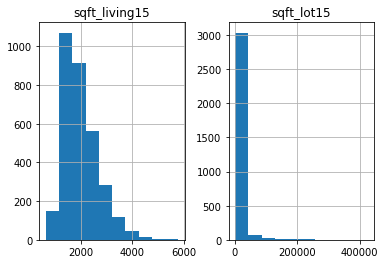

<Figure size 1440x1440 with 0 Axes>

In [126]:
#Plot the the last two features
viz = df[[
 'sqft_living15',
 'sqft_lot15',]]

viz.hist()
plt.figure(figsize=(20, 20))
plt.show()

Finding out the relationship between the dependent feature(price) and the independent features

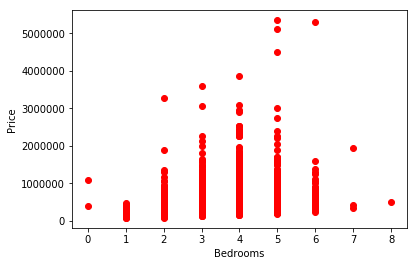

In [127]:
# Price vs bedrooms
plt.scatter(df.bedrooms, df.price, color="red")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

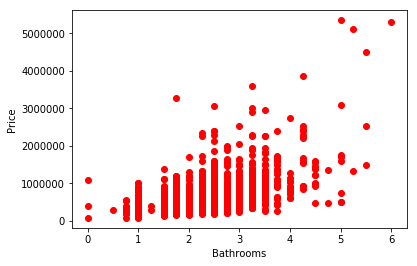

In [128]:
# Price vs bathrooms
plt.scatter(df.bathrooms, df.price, color="red")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

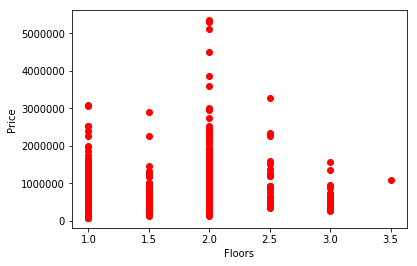

In [129]:
# Price vs floors
plt.scatter(df.floors, df.price, color="red")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

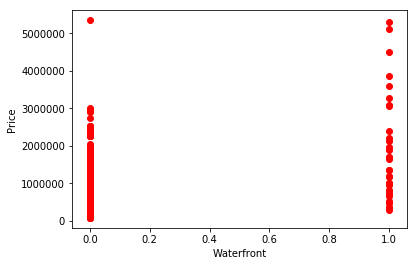

In [130]:
# Price vs waterfront
plt.scatter(df.waterfront, df.price, color="red")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()

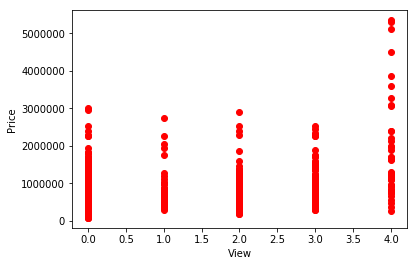

In [131]:
# Price vs view
plt.scatter(df.view, df.price, color="red")
plt.xlabel("View")
plt.ylabel("Price")
plt.show()

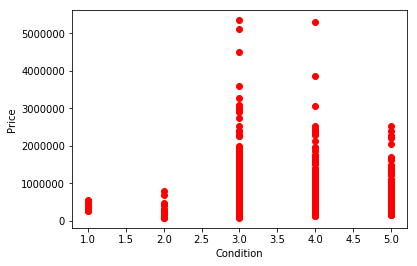

In [132]:
# Price vs condition
plt.scatter(df.condition, df.price, color="red")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

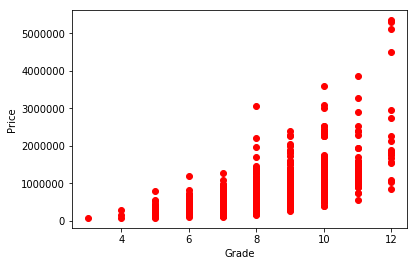

In [133]:
# Price vs grade
plt.scatter(df.grade, df.price, color="red")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

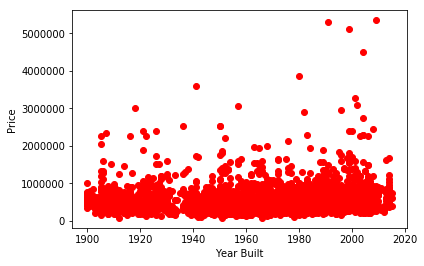

In [134]:
# Price vs yr_built
plt.scatter(df.yr_built, df.price, color="red")
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()

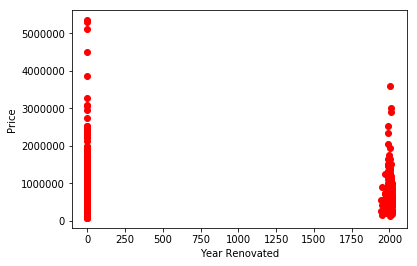

In [135]:
# Price vs yr_renovated
plt.scatter(df.yr_renovated, df.price, color="red")
plt.xlabel("Year Renovated")
plt.ylabel("Price")
plt.show()

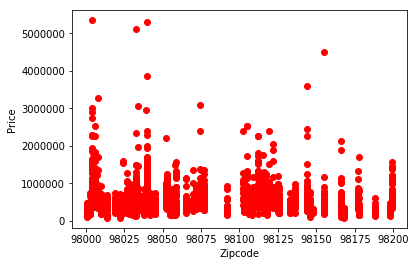

In [136]:
# Price vs zipcode
plt.scatter(df.zipcode, df.price, color="red")
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()

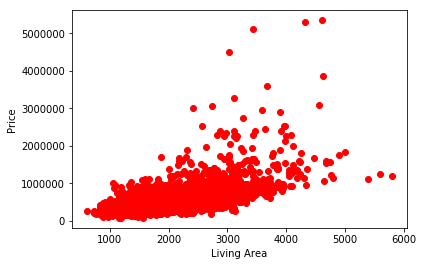

In [137]:
# Price vs sqft_living15
plt.scatter(df.sqft_living15, df.price, color="red")
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.show()

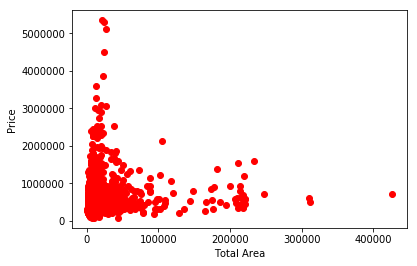

In [138]:
# Price vs sqft_lot15
plt.scatter(df.sqft_lot15, df.price, color="red")
plt.xlabel("Total Area")
plt.ylabel("Price")
plt.show()

## Remove Features based upon visualization

Six features will be removed with because after visualizing it with price they are not decently enough correlated. Namely:


1. zipcode
2. yr_renovated
3. sqft_lot15
4. view
5. waterfront
6. floors




In [139]:
df.drop(columns=["zipcode", "yr_renovated", "view", "waterfront", 
                 "sqft_lot15", "floors"], inplace=True)
df.head(2)

,price,bedrooms,bathrooms,condition,grade,yr_built,sqft_living15
0,221900.0,3,1.00,3,7,1955,1340.0
1,538000.0,3,2.25,3,7,1951,1690.0


## Normalize Data and train tes split

For better result all features will be normalized

In [143]:
df.columns.tolist()

['price',
 'bedrooms',
 'bathrooms',
 'condition',
 'grade',
 'yr_built',
 'sqft_living15']

In [0]:
from sklearn import preprocessing

msk = np.random.rand(len(X)) < 0.8
train = df[msk]
test = df[~msk]

train_x = np.asarray(train[['bedrooms',
 'bathrooms',
 'condition',
 'grade',
 'yr_built',
 'sqft_living15']])
train_y = np.asarray(train[["price"]])

test_x = np.asarray(train[['bedrooms',
 'bathrooms',
 'condition',
 'grade',
 'yr_built',
 'sqft_living15']])
test_y = np.asarray(train[["price"]])

train_x = preprocessing.StandardScaler().fit(train_x).transform(train_x)
train_y = preprocessing.StandardScaler().fit(train_y).transform(train_y)

test_x = preprocessing.StandardScaler().fit(test_x).transform(test_x)
test_y = preprocessing.StandardScaler().fit(test_y).transform(test_y)

# Train Model

## Build model

One type of model will be used in this project namely:


1.  Linear

In [145]:
#linear Model
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_x, train_y)
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [[-0.06790101  0.255702    0.0402162   0.47034168 -0.34510428  0.24800841]]
Intercept:  [1.12176278e-15]


# Evaluate Model

The Models will be evaluated two metrics with the following reasons :


1.   Mean Squared Error (MSE) : Find out how large the error of the prediction. Emphazing on large errors
2.   R2-Score = Find out how well fitted the created prediction line with the data



In [146]:
from sklearn.metrics import r2_score

yhat = lin_reg.predict(test_x)
print("Mean Absolute Error : %.2f" % np.mean((yhat - test_y) ** 2))
print(r2_score(yhat, test_y))

Mean Absolute Error : 0.43
0.23376392492312825
